### Calculate Forecast Bias relative to ERA-5 observations for SSW vs normal seasons.

12/1/2025

TEMPERATURE ONLY.

F25 and S13 events, 2011-2018. No final warmings. 

In [1]:
##imports for relevant packages 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import math
import scipy.stats
import pickle

In [2]:
from MBE_Temps import openfile, calculate_errors

#write a function to create an average timeseries over SSW events.
def make_array_ssw(ssw_dates,forecast,actual):
    n_events = len(ssw_dates)
    ssw_vals = np.empty((5,n_events,36))
    for i in range(5):
         for j, (year_ind, forecast_ind) in enumerate(ssw_dates):           
            if i < 4:
                ssw_vals[i, j, :] = forecast[i, year_ind, forecast_ind, :]
            else:
                ssw_vals[i, j, :] = actual[year_ind, forecast_ind, :]
    #take average of events 
    ssw_vals = np.nanmean(ssw_vals, axis = 1)
    return ssw_vals

In [3]:
##ssw date indexes based on F25/S13. 
#1/7/13, 1/7/2014, 2/4/2014, 12/31/2014, 01/28/2017, 02/10/2018
ssw_dates = [(1,2),(2,2),(2,5),(3,2),(5,5),(6,6)]
#ssw_dates = [(1,2),(2,5),(5,5),(6,6)]

In [4]:
#I would like to say thank you to DS&A for this one.
years = range(0, 7)
events = range(0, 8)

#convert list to a set for fast lookup
present = set(ssw_dates)

#collect normal event dates not in ssw events
normal_events = [(y, e) for y in years for e in events if (y, e) not in present]
len(normal_events)

50

In [5]:
#open ERA-5 and UFS data ... make ssw file
#temps
w_actual, w_forecast = openfile("ERA5_eurtemp","UFS_EurTempAnoms")
ssw_eur = make_array_ssw(ssw_dates,w_forecast,w_actual)
climo_eur = make_array_ssw(normal_events,w_forecast,w_actual)

w_actual, w_forecast = openfile("ERA5_novatemp","UFS_CanTempAnoms")
ssw_can = make_array_ssw(ssw_dates,w_forecast,w_actual)
climo_can = make_array_ssw(normal_events,w_forecast,w_actual)

w_actual, w_forecast = openfile("ERA5_seustemp","UFS_SEUSTempAnoms")
ssw_seus = make_array_ssw(ssw_dates,w_forecast,w_actual)
climo_seus = make_array_ssw(normal_events,w_forecast,w_actual)

In [6]:
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
myLocator = mticker.MultipleLocator(5)

#DESIGNATE LIST OF PROTOTYPES.
prototype = ["Prototype5","Prototype6","Prototype7","Prototype8"]
#Designate range of forecast days observed in UFS
forecast_days = [i for i in range(0,36,1)]

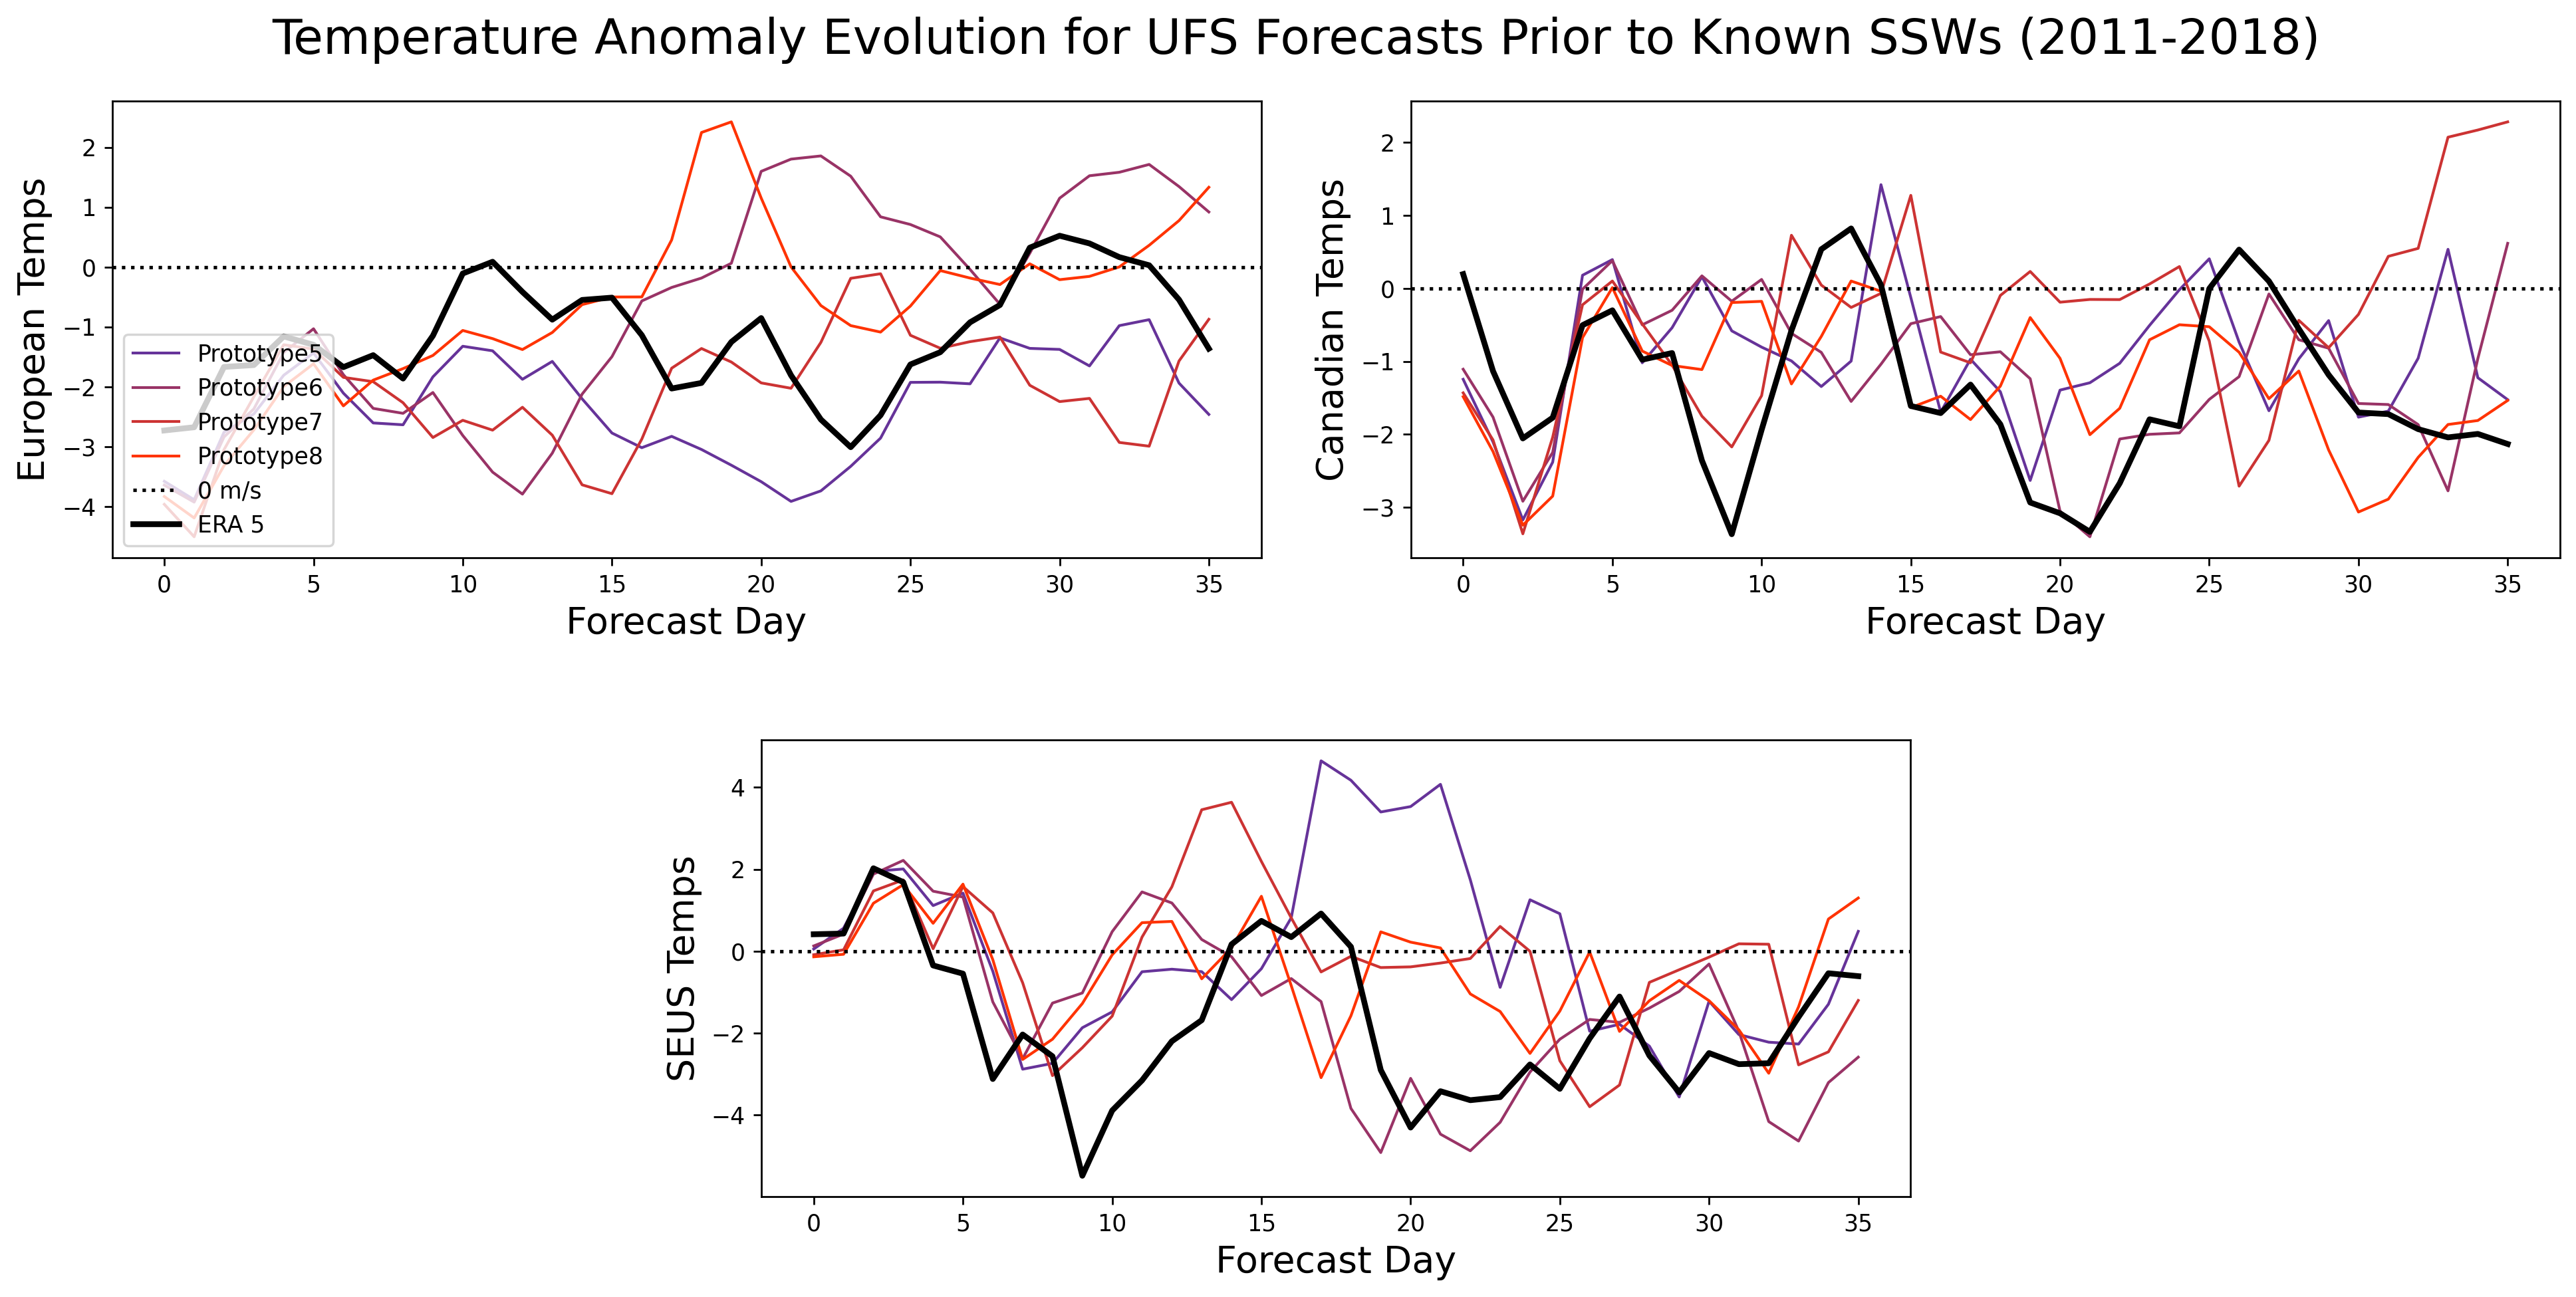

In [7]:
fig = plt.figure(figsize=(19,17), dpi=250)

#4x4 grid for better control of spacing
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.4, wspace=0.3)

#3 subplots
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])

#Centered third subplot at the bottom ... spanning columns 1 to 3
ax3 = fig.add_subplot(gs[1, 1:3])

fs = 16

for m in range(0, 5):
    if m == 4: 
        label = 'ERA 5'
        color = 'k'
        linewidth = 2.5
        ax1.axhline(y=0, color='k', linestyle=':', label="0 m/s")
        ax2.axhline(y=0, color='k', linestyle=':', label="0 m/s")
        ax3.axhline(y=0, color='k', linestyle=':', label="0 m/s")
    else: 
        label = str(prototype[m])
        colorR = (m + 2) / 5.
        color = (colorR, .2, 1 - colorR)
        linewidth = 1.2

    ax1.plot(forecast_days, ssw_eur[m, :], color=color, label=label, linewidth=linewidth)
    ax2.plot(forecast_days, ssw_can[m,:], color=color, label=label, linewidth=linewidth)
    ax3.plot(forecast_days, ssw_seus[m, :], color=color, label=label, linewidth=linewidth)

# Axis labels & formatting
ax1.set_ylabel('European Temps', fontsize=fs)
ax2.set_ylabel('Canadian Temps', fontsize=fs)
ax3.set_ylabel('SEUS Temps', fontsize=fs)

ax1.set_xlabel('Forecast Day', fontsize=fs)
ax2.set_xlabel('Forecast Day', fontsize=fs)
ax3.set_xlabel('Forecast Day', fontsize=fs)

ax1.legend(loc='lower left', fontsize='medium')

plt.suptitle("Temperature Anomaly Evolution for UFS Forecasts Prior to Known SSWs (2011-2018)", fontsize=21)
plt.subplots_adjust(top=0.95)
#plt.tight_layout()
#plt.show()
plt.savefig("SSW_temp_test.png")

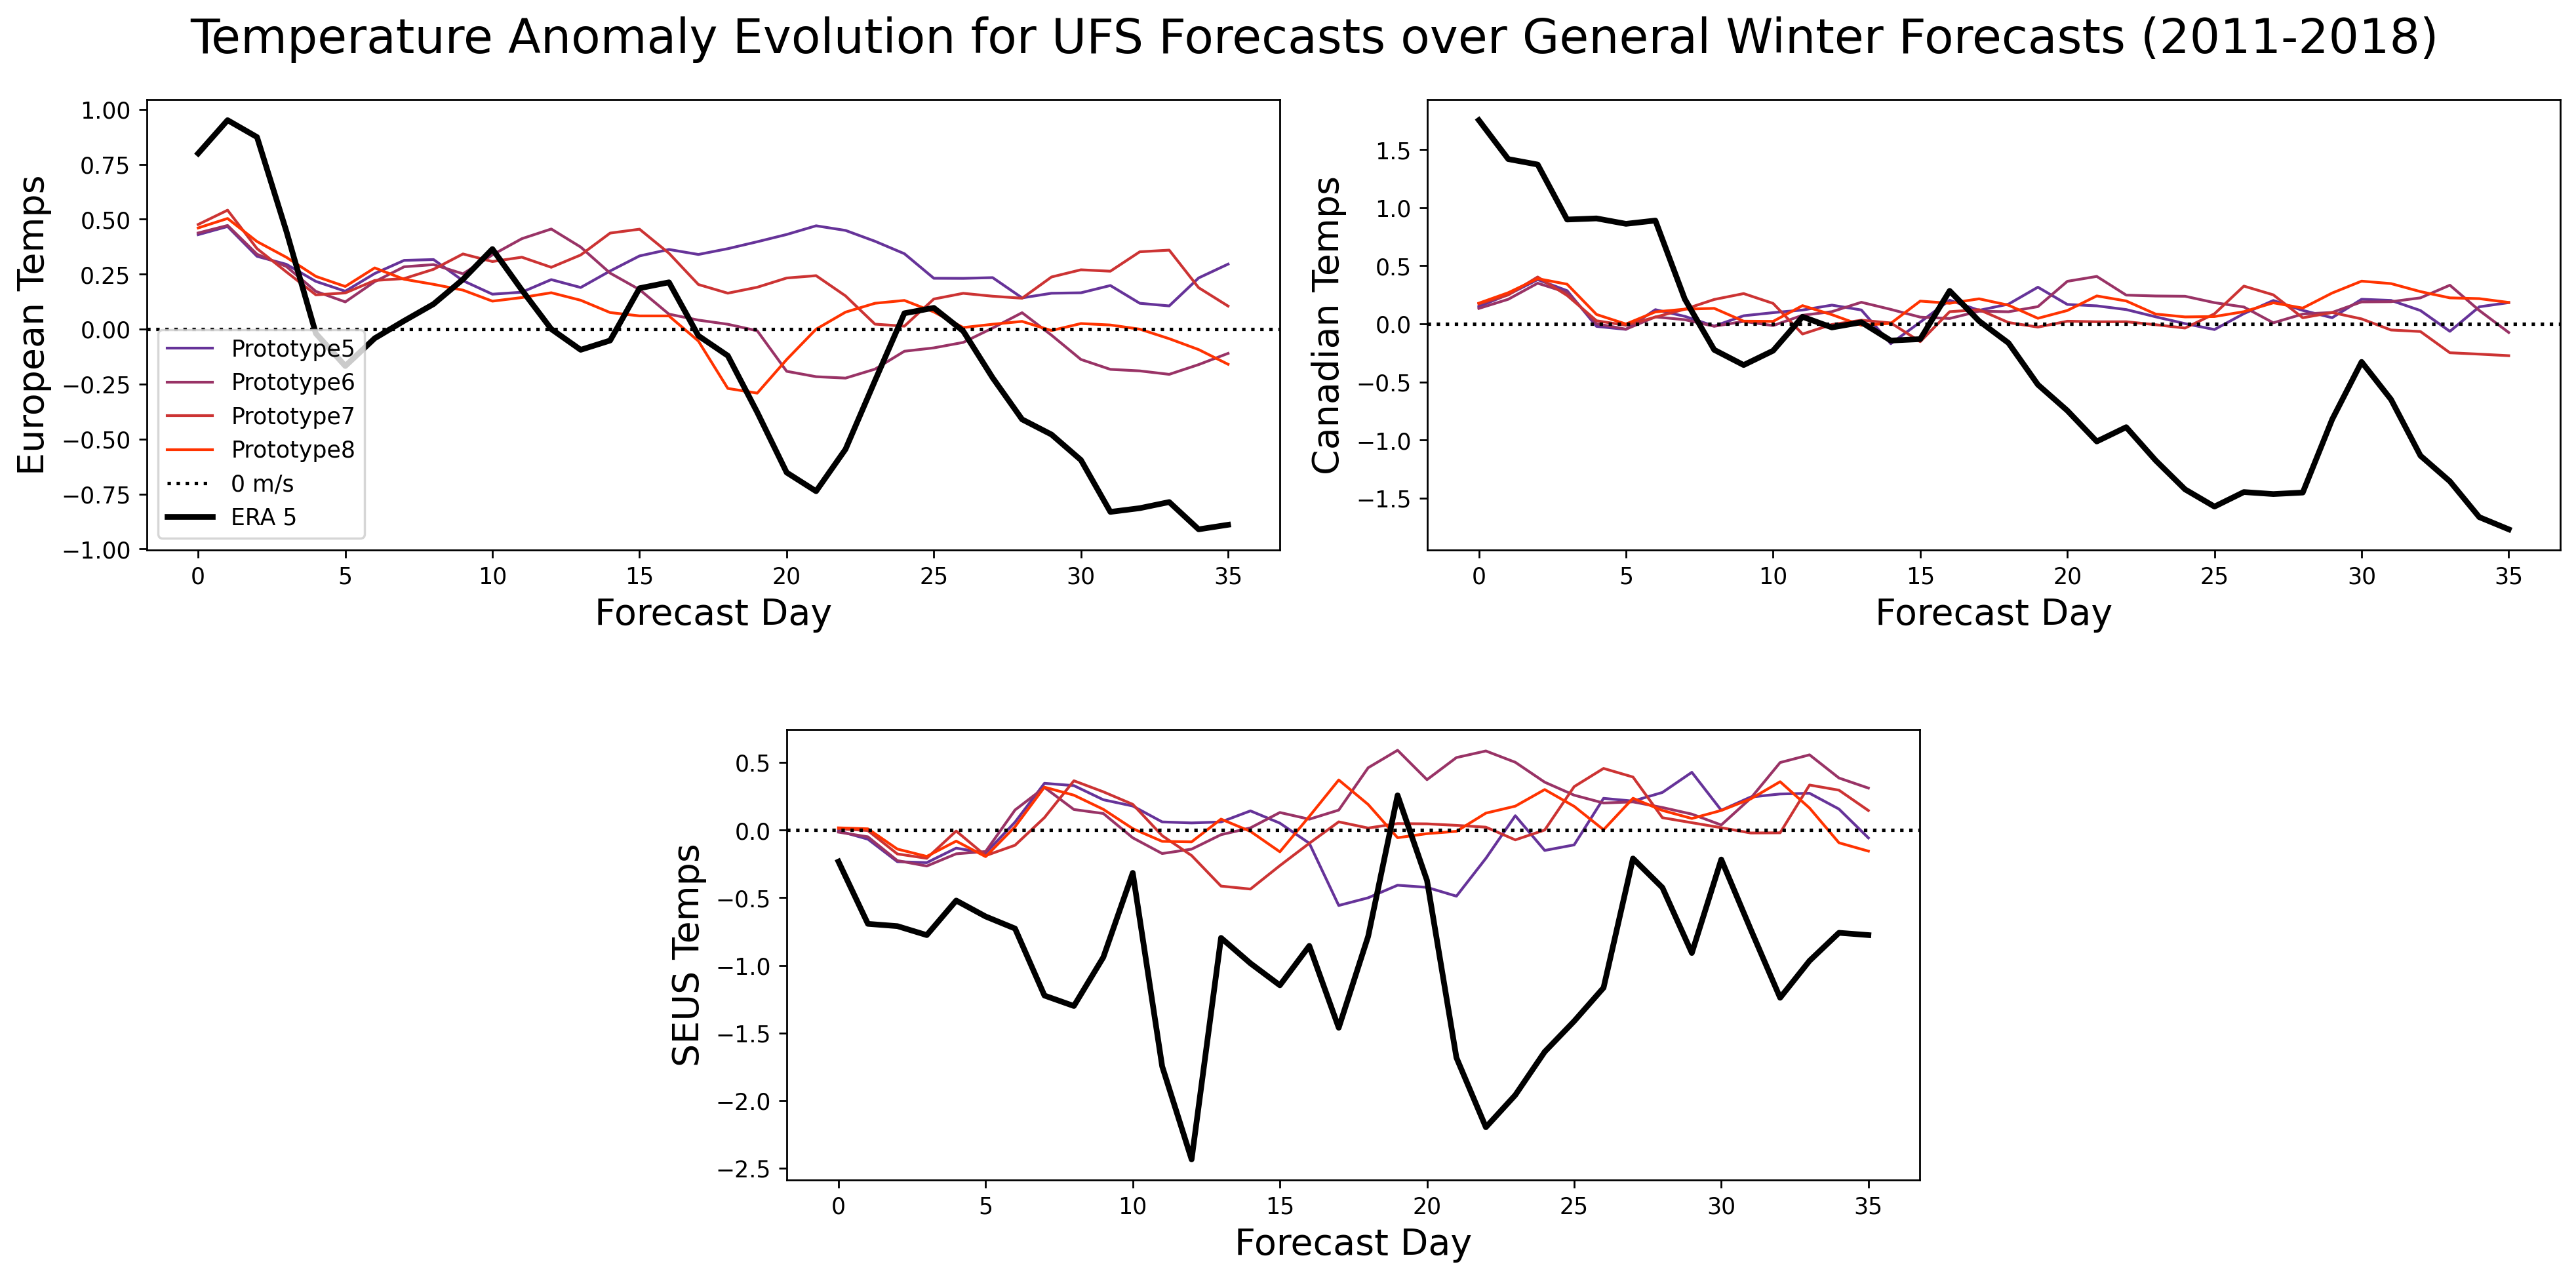

In [8]:
fig = plt.figure(figsize=(19,17), dpi=250)

#4x4 grid for better control of spacing
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.4, wspace=0.3)

#3 subplots
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])

#Centered third subplot at the bottom ... spanning columns 1 to 3
ax3 = fig.add_subplot(gs[1, 1:3])

fs = 16

for m in range(0, 5):
    if m == 4: 
        label = 'ERA 5'
        color = 'k'
        linewidth = 2.5
        ax1.axhline(y=0, color='k', linestyle=':', label="0 m/s")
        ax2.axhline(y=0, color='k', linestyle=':', label="0 m/s")
        ax3.axhline(y=0, color='k', linestyle=':', label="0 m/s")
    else: 
        label = str(prototype[m])
        colorR = (m + 2) / 5.
        color = (colorR, .2, 1 - colorR)
        linewidth = 1.2

    ax1.plot(forecast_days, climo_eur[m, :], color=color, label=label, linewidth=linewidth)
    ax2.plot(forecast_days, climo_can[m,:], color=color, label=label, linewidth=linewidth)
    ax3.plot(forecast_days, climo_seus[m, :], color=color, label=label, linewidth=linewidth)

# Axis labels & formatting
ax1.set_ylabel('European Temps', fontsize=fs)
ax2.set_ylabel('Canadian Temps', fontsize=fs)
ax3.set_ylabel('SEUS Temps', fontsize=fs)

ax1.set_xlabel('Forecast Day', fontsize=fs)
ax2.set_xlabel('Forecast Day', fontsize=fs)
ax3.set_xlabel('Forecast Day', fontsize=fs)

ax1.legend(loc='lower left', fontsize='medium')

plt.suptitle("Temperature Anomaly Evolution for UFS Forecasts over General Winter Forecasts (2011-2018)", fontsize=21)
plt.subplots_adjust(top=0.95)
#plt.tight_layout()
#plt.show()
plt.savefig("Normal_temp_test.png")

In [9]:
#first,verify 2m UFS temp for the last two weeks just to see how bad it actually is 
#if so, test the RF model with first two weeks of vortex metrics to see whether there is any improvement in forecasting these temperatures.

##RF input would be (#samples ... 7*5*14 days ... 8 features)
#this would be relevant to looking at the operational implementation of the RF model. 

#or is there a way to use the RF to post-process the UFS


##take graphcast 2019 event data and plot gif 